In [1]:
import matplotlib.pyplot as plt
import pandas
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# import model classes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Load dataset
filename = 'arabicReading.data'
names = ['word count','sentence count','p95','mean','median','noun','verb','prep','part','conj','adv','adj','difficulty']
with open(filename) as data_file:
    dataset = pandas.read_csv(data_file,names=names)  # pandas DataFrame
print(dataset)

     word count  sentence count    p95       mean  median      noun      verb  \
0            40               7  21.70  11.333333    10.0  0.676471  0.000000   
1           247              26  76.60  22.250000     9.5  0.556180  0.112360   
2            20               2   9.20   3.200000     1.0  0.687500  0.125000   
3            42               3  17.50   5.666667     3.0  0.647059  0.117647   
4            29               4   7.50   2.666667     1.0  0.562500  0.187500   
5            26               2  11.00   4.200000     3.0  0.619048  0.047619   
6            23               3   8.40   4.250000     3.5  0.529412  0.294118   
7           101              20  47.00  13.666667     3.5  0.707317  0.060976   
8            86              22  38.65  15.250000     8.5  0.704918  0.049180   
9            95               6  34.25  11.500000     6.0  0.608696  0.159420   
10           74              18  29.00   9.333333     4.0  0.625000  0.125000   
11           18             

In [8]:
# Split-out validation dataset
array = dataset.values
len_names = len(names)
features = array[:,0:len_names-1]  # comma in slice signifies a tuple (tuples in slices is a numpy array thing)
labels = array[:,-1]
validation_size = 0.10
seed = 7
feats_train, feats_validation, labels_train, labels_validation = model_selection.train_test_split(features, labels, test_size=validation_size, random_state=seed)

In [9]:
# Test options and evaluation metric
seed = 7  # seeds the randomizer so that 'random' choices are the same in each run
scoring = 'accuracy'
print()

In [10]:
print('Initializing models...')
# Spot Check Algorithms
models = [('LR', LogisticRegression()),
          ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('NB', GaussianNB()),
          ('SVM', SVC())]
print('Training and testing each model using 10-fold cross-validation...')
# https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, feats_train, labels_train,
                                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '{}:\t{:.4f}\t({:.4f})'.format(name, cv_results.mean(),
                                         cv_results.std())
    print(msg)

Initializing models...
Training and testing each model using 10-fold cross-validation...
LR:	0.6634	(0.0411)
LDA:	0.6684	(0.0495)
KNN:	0.6395	(0.0545)
CART:	0.6133	(0.0494)


c:\users\maste\envs\envtest\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


NB:	0.6032	(0.0585)
SVM:	0.6195	(0.0310)


Drawing algorithm comparison boxplots...


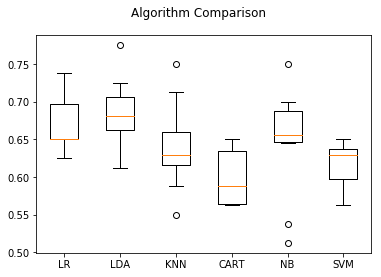

In [6]:
print('Drawing algorithm comparison boxplots...')
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig = plt.gcf()
fig.savefig('compare_algorithms.png')

In [7]:
# Make predictions on validation dataset
# Using svc because it performed best on cross-validation
final_model = SVC()
final_model.fit(feats_train, labels_train)
predictions = final_model.predict(feats_validation)
print('Accuracy:', accuracy_score(labels_validation, predictions))
print()
print('Confusion matrix:')
cm_labels = '1 2 3 4'.split()
print('labels:', cm_labels)
print(confusion_matrix(labels_validation, predictions, labels=cm_labels))
print()
print('Classification report:')
print(classification_report(labels_validation, predictions))
print(dir(final_model))
if hasattr(final_model, 'feature_importances_'):
    print('Feature "importances":')
    print(final_model.feature_importances_)
if hasattr(final_model, 'coef_'):
    print('Feature correlation coefficients:')
    print(final_model.coef_)

Accuracy: 0.6067415730337079

Confusion matrix:
labels: ['1', '2', '3', '4']


c:\users\maste\envs\envtest\lib\site-packages\sklearn\metrics\classification.py:258: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true